In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('train.csv',sep='\t')


In [25]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [26]:
df.shape

(156060, 4)

#### Explore data

In [27]:
df.Sentiment.unique()

array([1, 2, 3, 4, 0])

In [28]:
df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


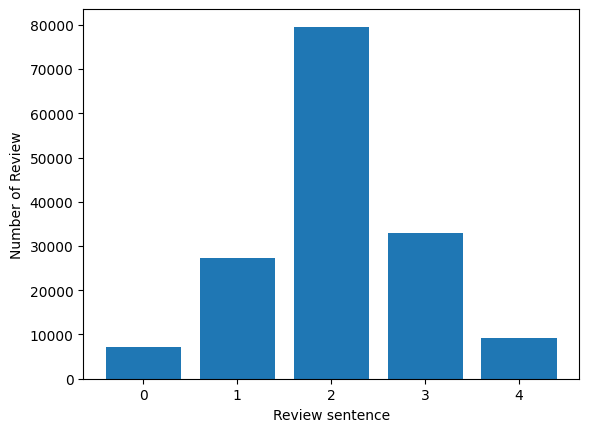

In [30]:
sentiment_count = df.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values,sentiment_count['Phrase'])

plt.xlabel('Review sentence')
plt.ylabel('Number of Review')
plt.show()

### Text preprocessing

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)

text_counts = cv.fit_transform(df['Phrase'])


In [42]:
text_counts.shape

(156060, 14988)

### Train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(text_counts, df['Sentiment'],test_size=0.3, random_state=42)


### Building models

In [ ]:
# use multinomial NaiveBayes

from sklearn.naive_bayes import Mult